In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from utils.preprocess import preprocess
from utils.peakDetect import getBreakpoint
from utils.templateMatcher import templateMatcher, rotate_image

# Talus Detection

In [2]:
# Set parameters
## Templates
template_left_path = 'templates/template_talus_left.jpg'
template_right_path = 'templates/template_talus_right.jpg'

## Template scaling
min_scale = 0.9
max_scale = 1.1
scale_step = 0.1

## Template rotating angles
min_angle = -45
max_angle = 45
angle_step = 15

In [ ]:
# Input Image path
img_path = "../dev/016.jpg"

# Preprocess
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
resized = (1024,1024)
img_prep = preprocess(img, resized, region="low")

# Get breakpoints for left and right legs
bp = getBreakpoint(img_prep)

# Template Matching: Left image
template_left = cv2.imread(template_left_path, cv2.IMREAD_GRAYSCALE)
img_left = img_prep[:,:bp]
x, y, w, h, angle1 = templateMatcher(img_left,
                             template_left,
                             scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                             angles=np.arange(min_angle, angle_step+1, angle_step),
                             )
## scale back
[x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
y += img.shape[0]-img.shape[1]
cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

# Template Matching: Right image
template_right = cv2.imread(template_right_path, cv2.IMREAD_GRAYSCALE)
img_right = img_prep[:,bp:]
x, y, w, h, angle2 = templateMatcher(img_right,
                             template_right,
                             scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                             angles=np.arange(-1*angle_step, max_angle+1, angle_step),
                             )
x += bp
## scale back
[x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
y += img.shape[0]-img.shape[1]
cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

plt.figure(figsize=(5,5))
plt.imshow(img, cmap="gray")
plt.title(f"{angle1} {angle2}")
plt.show()

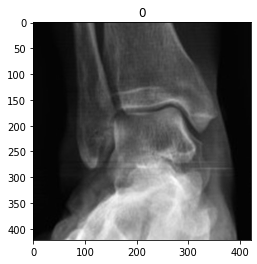

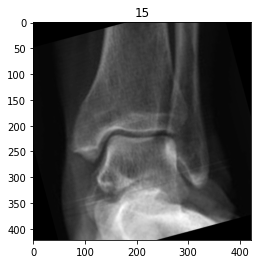

In [13]:
# Input Image path
img_path = "../dev/016.jpg"

# Preprocess
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
resized = (1024,1024)
img_prep = preprocess(img, resized, region="low")

# Get breakpoints for left and right legs
bp = getBreakpoint(img_prep)

# Template Matching: Left image
template_left = cv2.imread(template_left_path, cv2.IMREAD_GRAYSCALE)
img_left = img_prep[:,:bp]
x, y, w, h, angle1 = templateMatcher(img_left,
                             template_left,
                             scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                             angles=np.arange(min_angle, angle_step+1, angle_step),
                             )
## scale back
[x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
y += img.shape[0]-img.shape[1]
# cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)
plt.imshow(img[y:y+h,x:x+w], cmap="gray")
plt.title(f"{angle1}")
plt.show()

# Template Matching: Right image
template_right = cv2.imread(template_right_path, cv2.IMREAD_GRAYSCALE)
img_right = img_prep[:,bp:]
x, y, w, h, angle2 = templateMatcher(img_right,
                             template_right,
                             scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                             angles=np.arange(-1*angle_step, max_angle+1, angle_step),
                             )
x += bp
## scale back
[x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
y += img.shape[0]-img.shape[1]
# cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)
plt.imshow(rotate_image(img[y:y+h,x:x+w], -angle2), cmap="gray")
plt.title(f"{angle2}")
plt.show()

In [16]:
dev_path = "../dev/"
i=1
plt.figure(figsize=(30,40))
for img_name in os.listdir(dev_path)[:40]:
    if img_name.endswith('.jpg'):
        img_path = dev_path+img_name

        # Preprocess
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        resized = (1024,1024)
        img_prep = preprocess(img, resized, region="low")

        # Get breakpoints for left and right legs
        bp = getBreakpoint(img_prep)

        # Template Matching: Left image
        template_left = cv2.imread(template_left_path, cv2.IMREAD_GRAYSCALE)
        img_left = img_prep[:,:bp]
        x, y, w, h, angle = templateMatcher(img_left,
                                    template_left,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(min_angle, angle_step+1, angle_step),
                                    )
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += img.shape[0]-img.shape[1]
        cv2.imwrite(f"../dev_talus_res_rotated/left/{img_name}", rotate_image(img[y:y+h,x:x+w], -angle))

        # Template Matching: Right image
        template_right = cv2.imread(template_right_path, cv2.IMREAD_GRAYSCALE)
        img_right = img_prep[:,bp:]
        x, y, w, h, angle = templateMatcher(img_right,
                                    template_right,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(-1*angle_step, max_angle+1, angle_step),
                                    )
        x += bp
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += img.shape[0]-img.shape[1]
        cv2.imwrite(f"../dev_talus_res_rotated/right/{img_name}", rotate_image(img[y:y+h,x:x+w], -angle))

<Figure size 2160x2880 with 0 Axes>

## Test with dev set

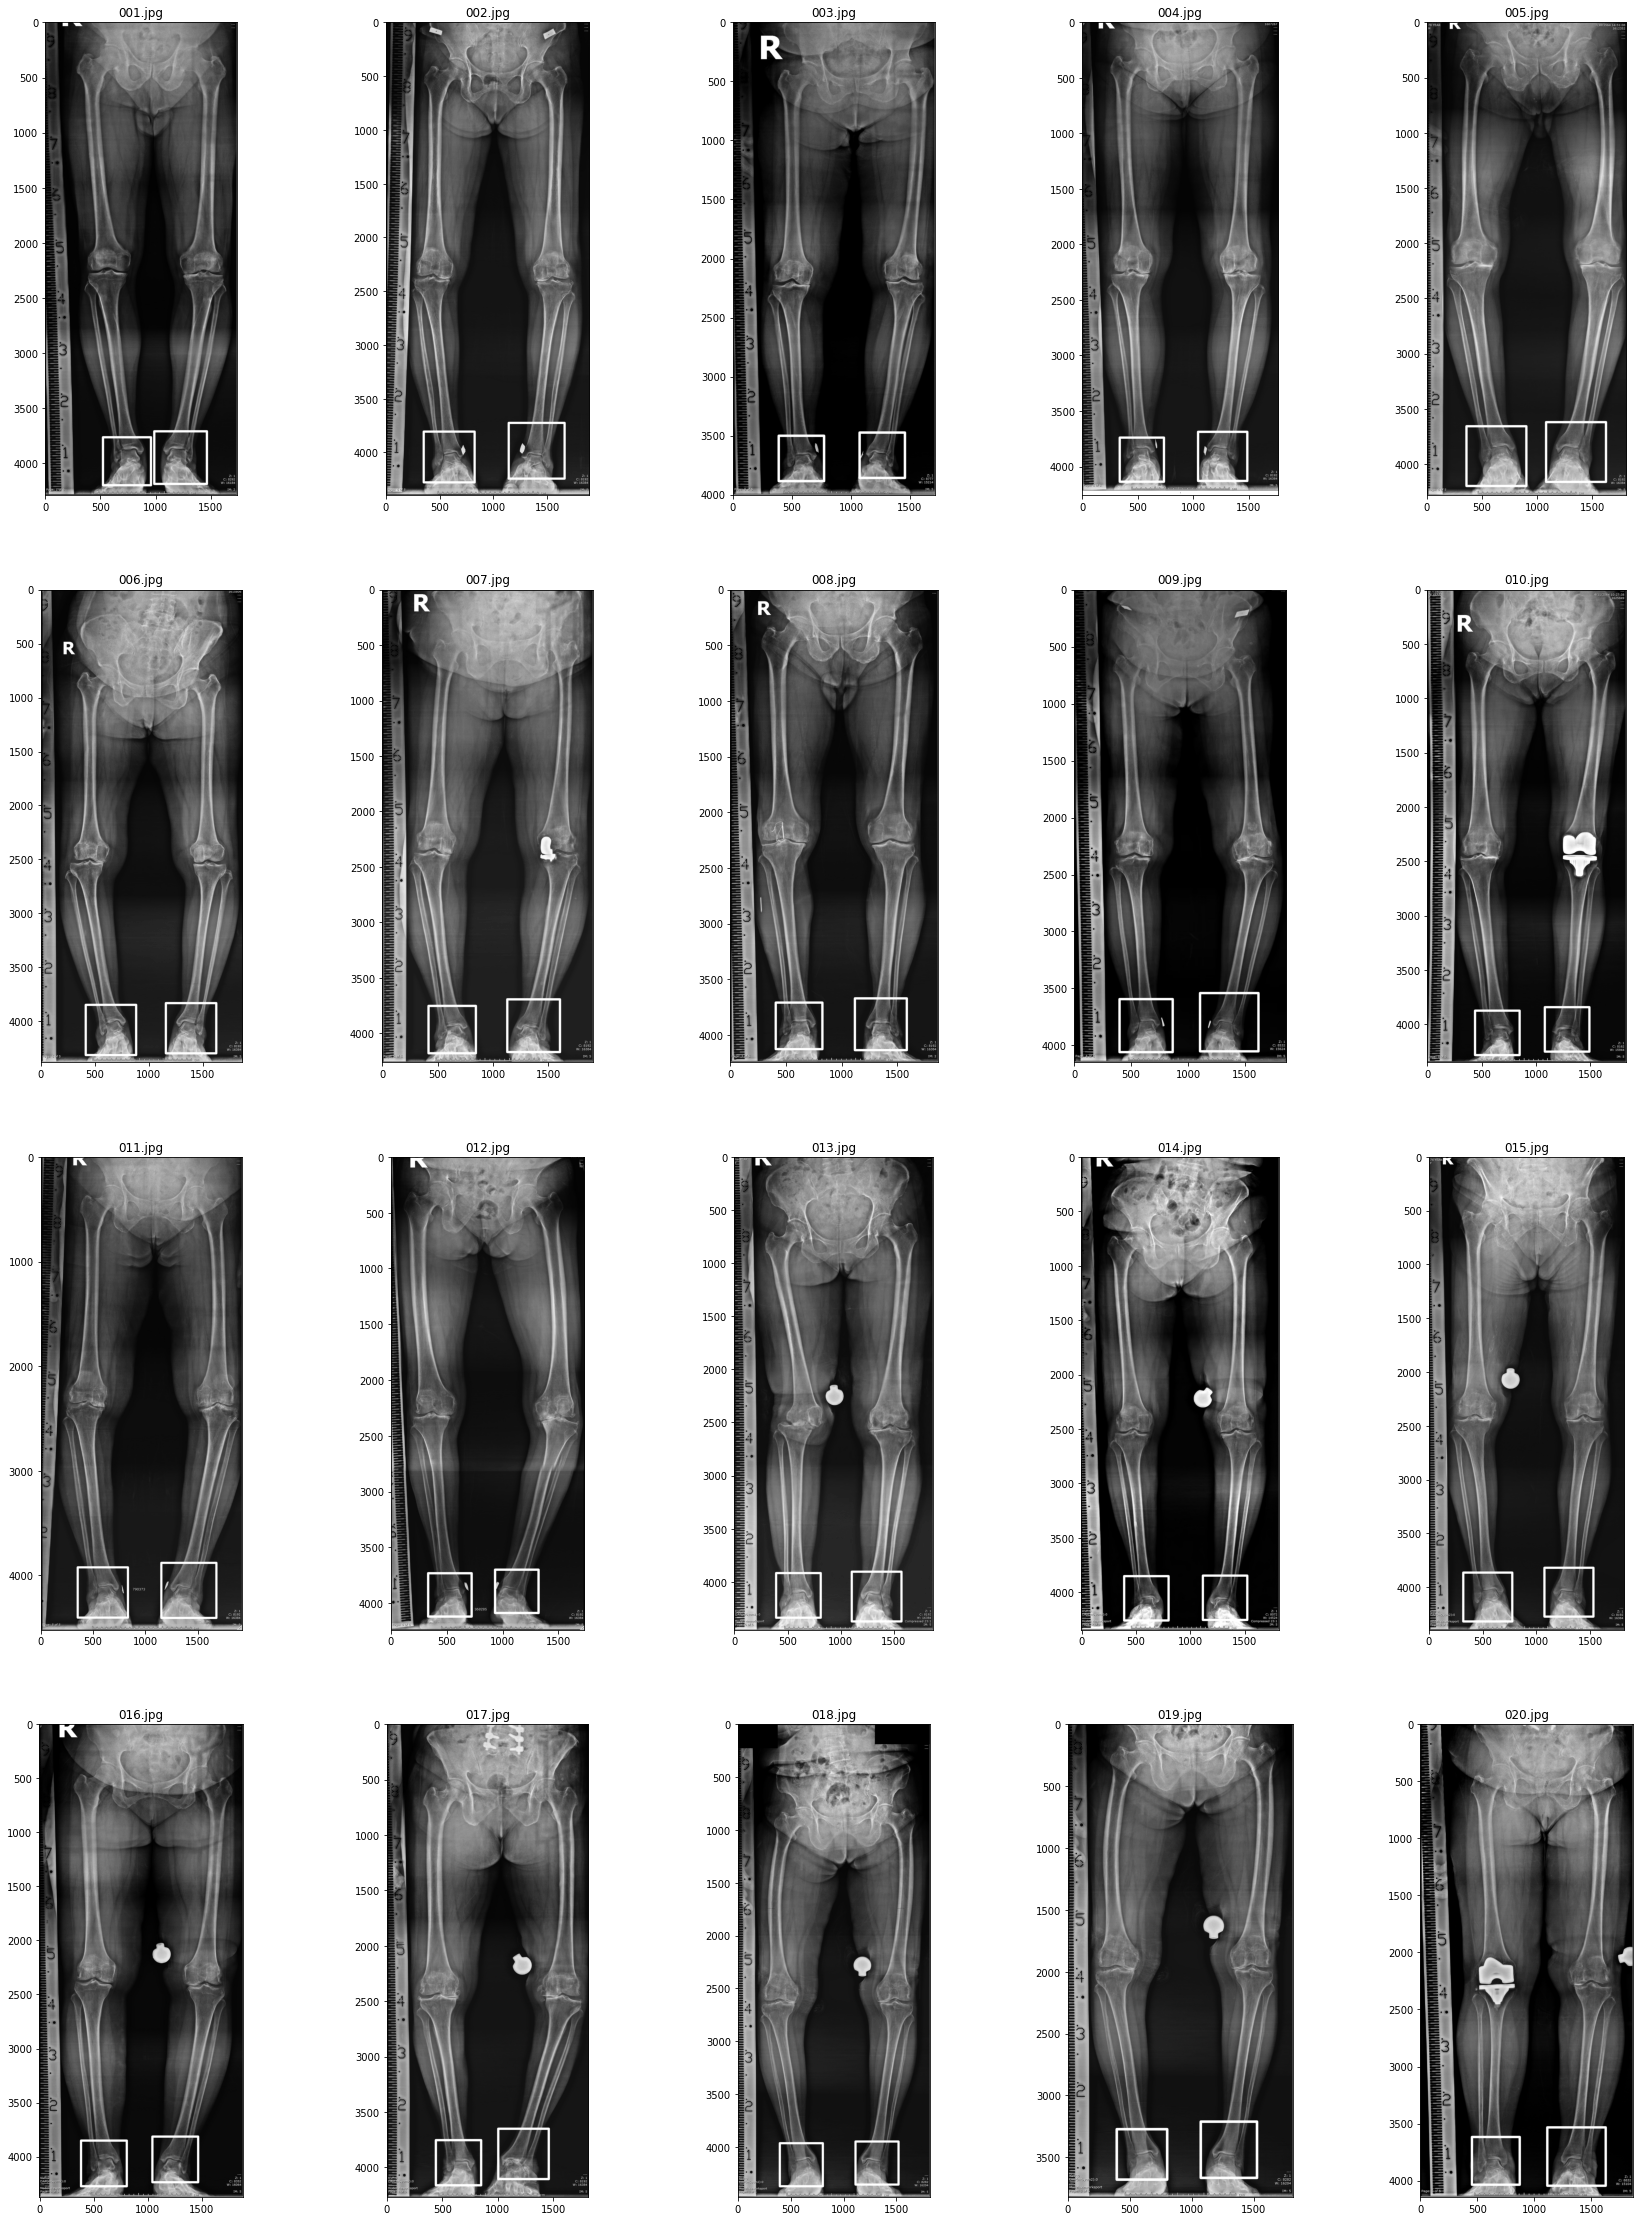

In [8]:
dev_path = "../dev/"
i=1
plt.figure(figsize=(30,40))
for img_name in os.listdir(dev_path)[:20]:
    if img_name.endswith('.jpg'):
        img_path = dev_path+img_name

        # Preprocess
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        resized = (1024,1024)
        img_prep = preprocess(img, resized, region="low")

        # Get breakpoints for left and right legs
        bp = getBreakpoint(img_prep)

        # Template Matching: Left image
        template_left = cv2.imread(template_left_path, cv2.IMREAD_GRAYSCALE)
        img_left = img_prep[:,:bp]
        x, y, w, h = templateMatcher(img_left,
                                    template_left,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(min_angle, angle_step+1, angle_step),
                                    )
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += img.shape[0]-img.shape[1]
        cv2.imwrite(f"../dev_talus_res/left/{img_name}", img[y:y+h,x:x+w])
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

        # Template Matching: Right image
        template_right = cv2.imread(template_right_path, cv2.IMREAD_GRAYSCALE)
        img_right = img_prep[:,bp:]
        x, y, w, h = templateMatcher(img_right,
                                    template_right,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(-1*angle_step, max_angle+1, angle_step),
                                    )
        x += bp
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += img.shape[0]-img.shape[1]
        cv2.imwrite(f"../dev_talus_res/right/{img_name}", img[y:y+h,x:x+w])
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

        plt.subplot(4,5,i)
        i+=1
        plt.imshow(img, cmap="gray")
        plt.title(img_name)

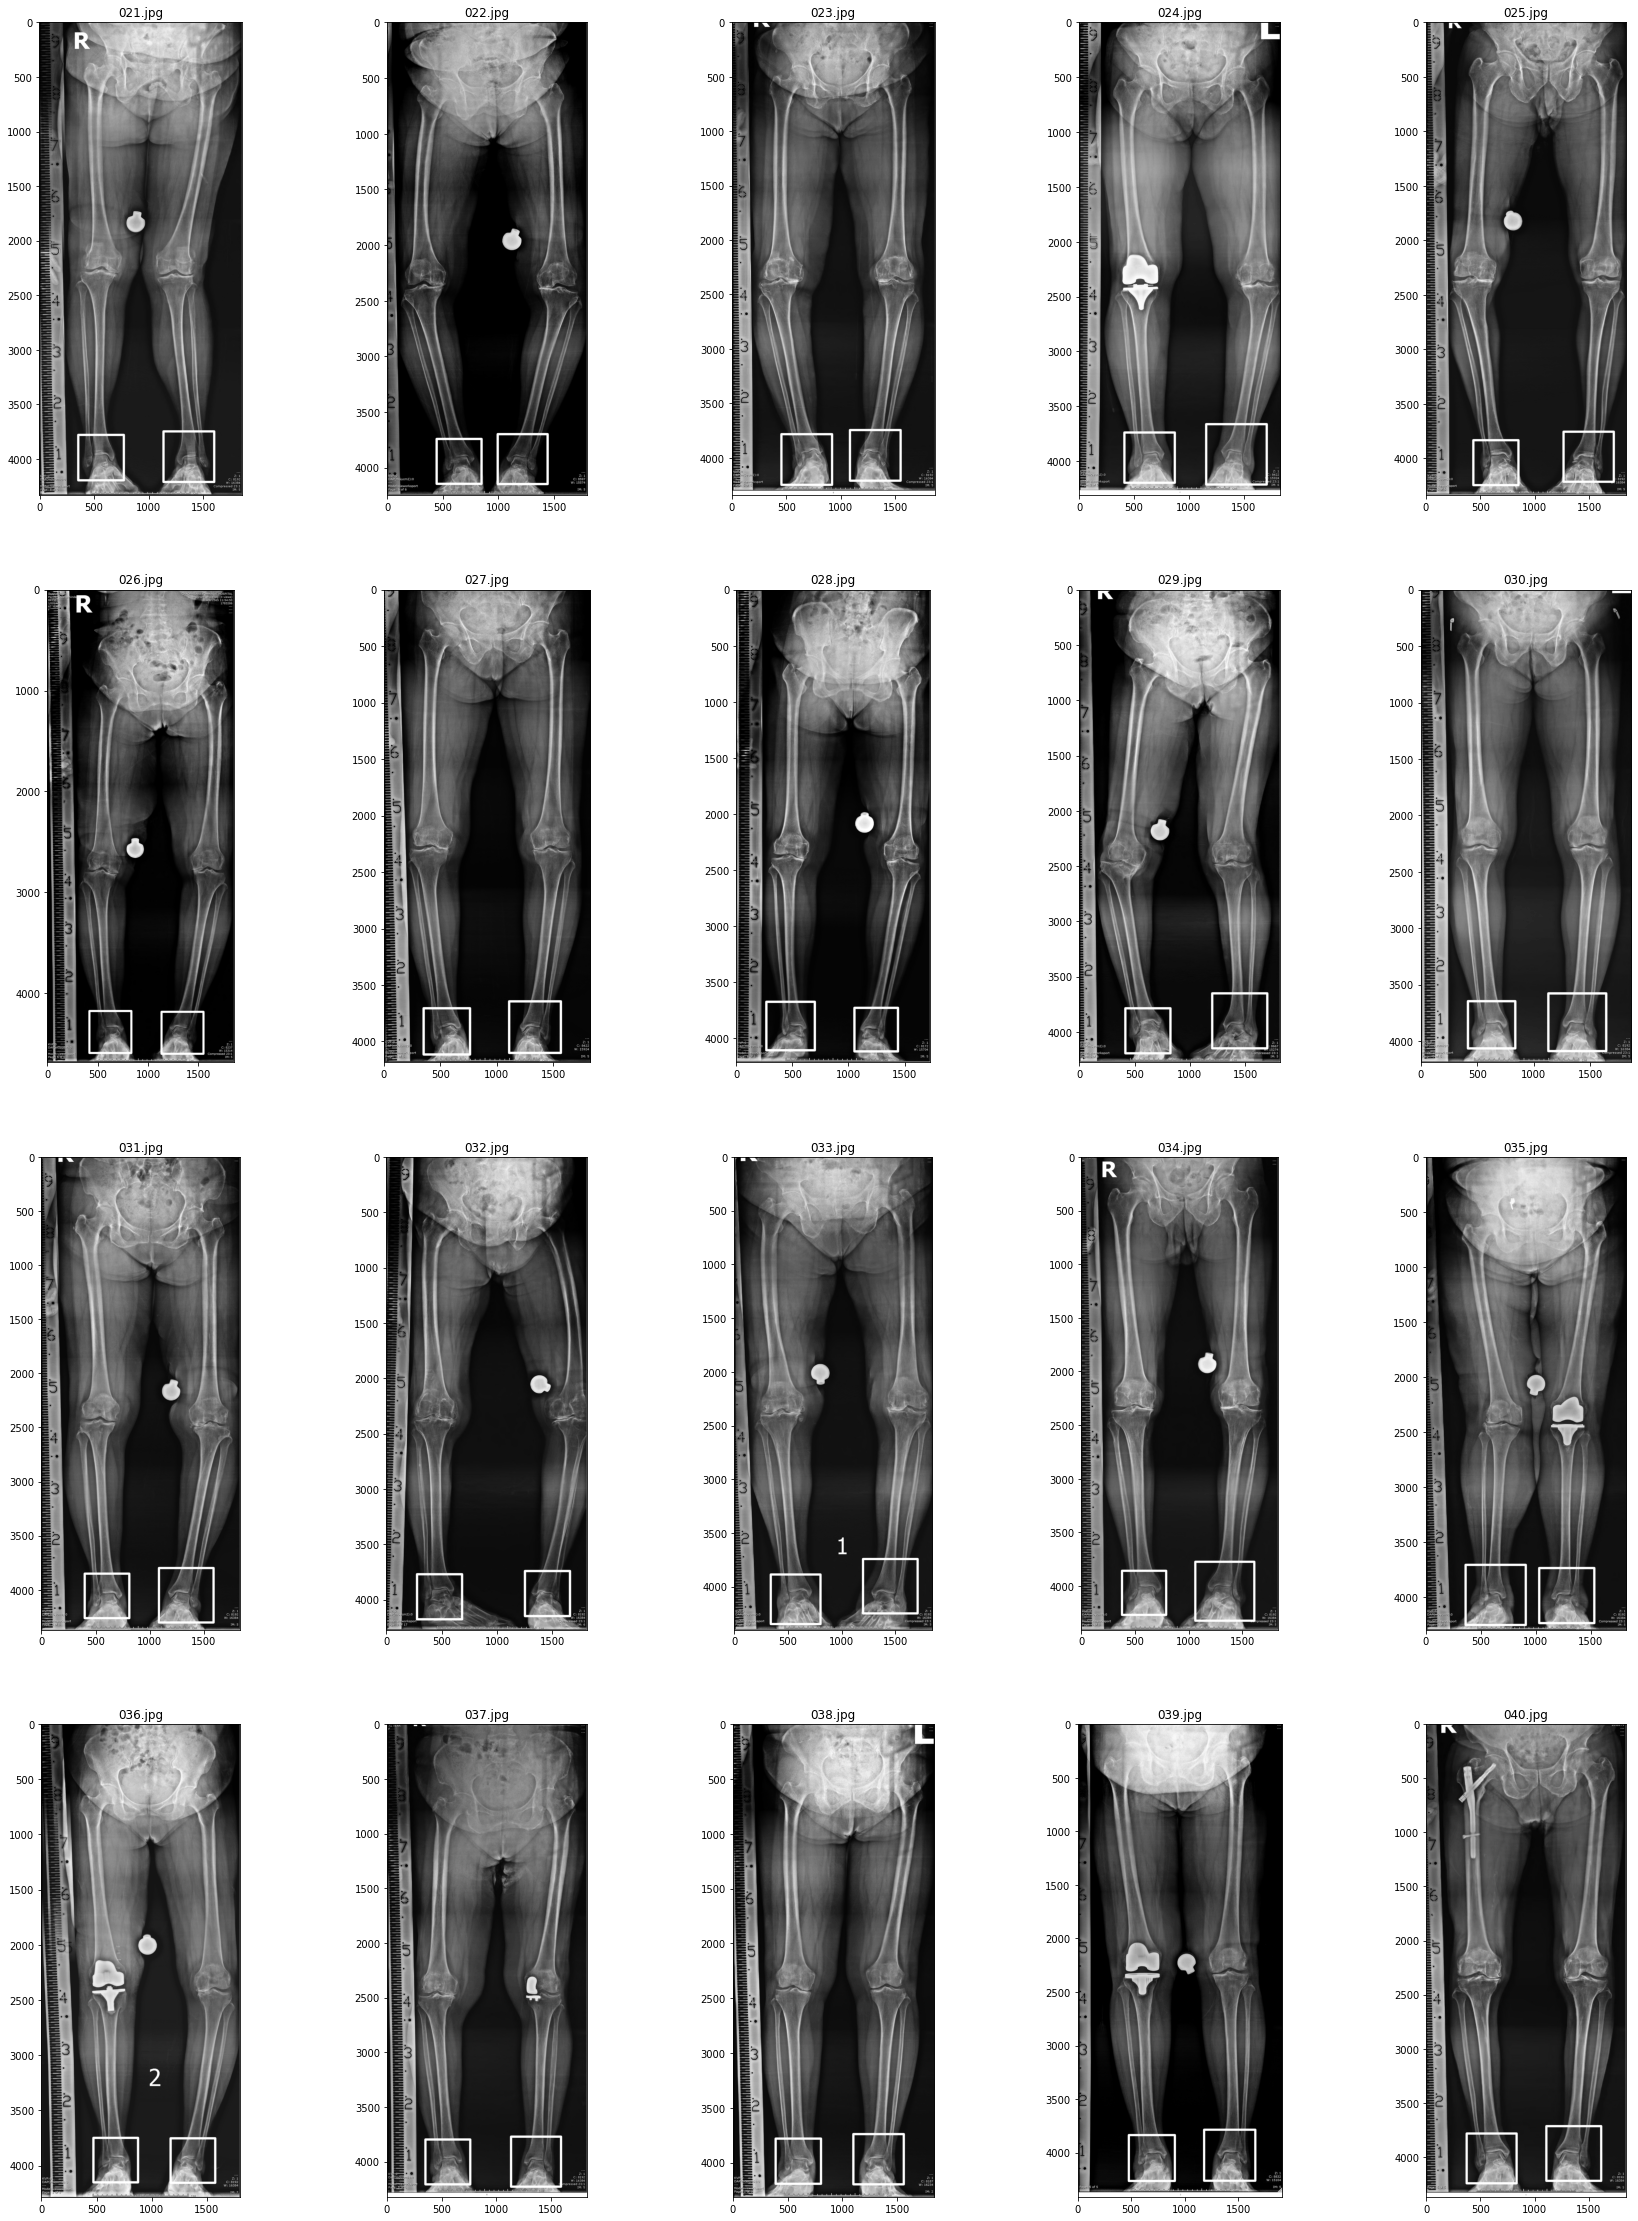

In [9]:
dev_path = "../dev/"
i=1
plt.figure(figsize=(30,40))
for img_name in os.listdir(dev_path)[20:40]:
    if img_name.endswith('.jpg'):
        img_path = dev_path+img_name

        # Preprocess
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        resized = (1024,1024)
        img_prep = preprocess(img, resized, region="low")

        # Get breakpoints for left and right legs
        bp = getBreakpoint(img_prep)

        # Template Matching: Left image
        template_left = cv2.imread(template_left_path, cv2.IMREAD_GRAYSCALE)
        img_left = img_prep[:,:bp]
        x, y, w, h = templateMatcher(img_left,
                                    template_left,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(min_angle, angle_step+1, angle_step),
                                    )
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += img.shape[0]-img.shape[1]
        cv2.imwrite(f"../dev_talus_res/left/{img_name}", img[y:y+h,x:x+w])
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

        # Template Matching: Right image
        template_right = cv2.imread(template_right_path, cv2.IMREAD_GRAYSCALE)
        img_right = img_prep[:,bp:]
        x, y, w, h = templateMatcher(img_right,
                                    template_right,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(-1*angle_step, max_angle+1, angle_step),
                                    )
        x += bp
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += img.shape[0]-img.shape[1]
        cv2.imwrite(f"../dev_talus_res/right/{img_name}", img[y:y+h,x:x+w])
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

        plt.subplot(4,5,i)
        i+=1
        plt.imshow(img, cmap="gray")
        plt.title(img_name)

# Knee Detection

In [68]:
# Set parameters
## Templates
template_left_path = 'templates/template_knee_left.jpg'
template_right_path = 'templates/template_knee_right.jpg'

## Template scaling
min_scale = 0.9
max_scale = 1.1
scale_step = 0.1

## Template rotating angles
min_angle = -45
max_angle = 45
angle_step = 10

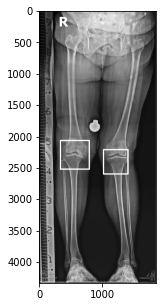

In [44]:
# Input Image path
img_path = "../test_dark.jpg"

# Preprocess
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
resized = (1024,1024)
img_prep = preprocess(img, resized, region="mid")

# Get breakpoints for left and right legs
bp = getBreakpoint(img_prep)

# Template Matching: Left image
template_left = cv2.imread(template_left_path, cv2.IMREAD_GRAYSCALE)
img_left = img_prep[:,:bp]
x, y, w, h = templateMatcher(img_left,
                             template_left,
                             scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                             angles=np.arange(min_angle, angle_step+1, angle_step),
                             )
## scale back
[x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
y += (img.shape[0]-img.shape[1])//2
cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

# Template Matching: Right image
template_right = cv2.imread(template_right_path, cv2.IMREAD_GRAYSCALE)
img_right = img_prep[:,bp:]
x, y, w, h = templateMatcher(img_right,
                             template_right,
                             scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                             angles=np.arange(-1*angle_step, max_angle+1, angle_step),
                             )
x += bp
## scale back
[x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
y += (img.shape[0]-img.shape[1])//2
cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)
# cv2.rectangle(img_prep, (x,y), (x+w,y+h), (255, 255, 255), 5)

plt.figure(figsize=(5,5))
plt.imshow(img, cmap="gray")
plt.show()

## Test with dev set

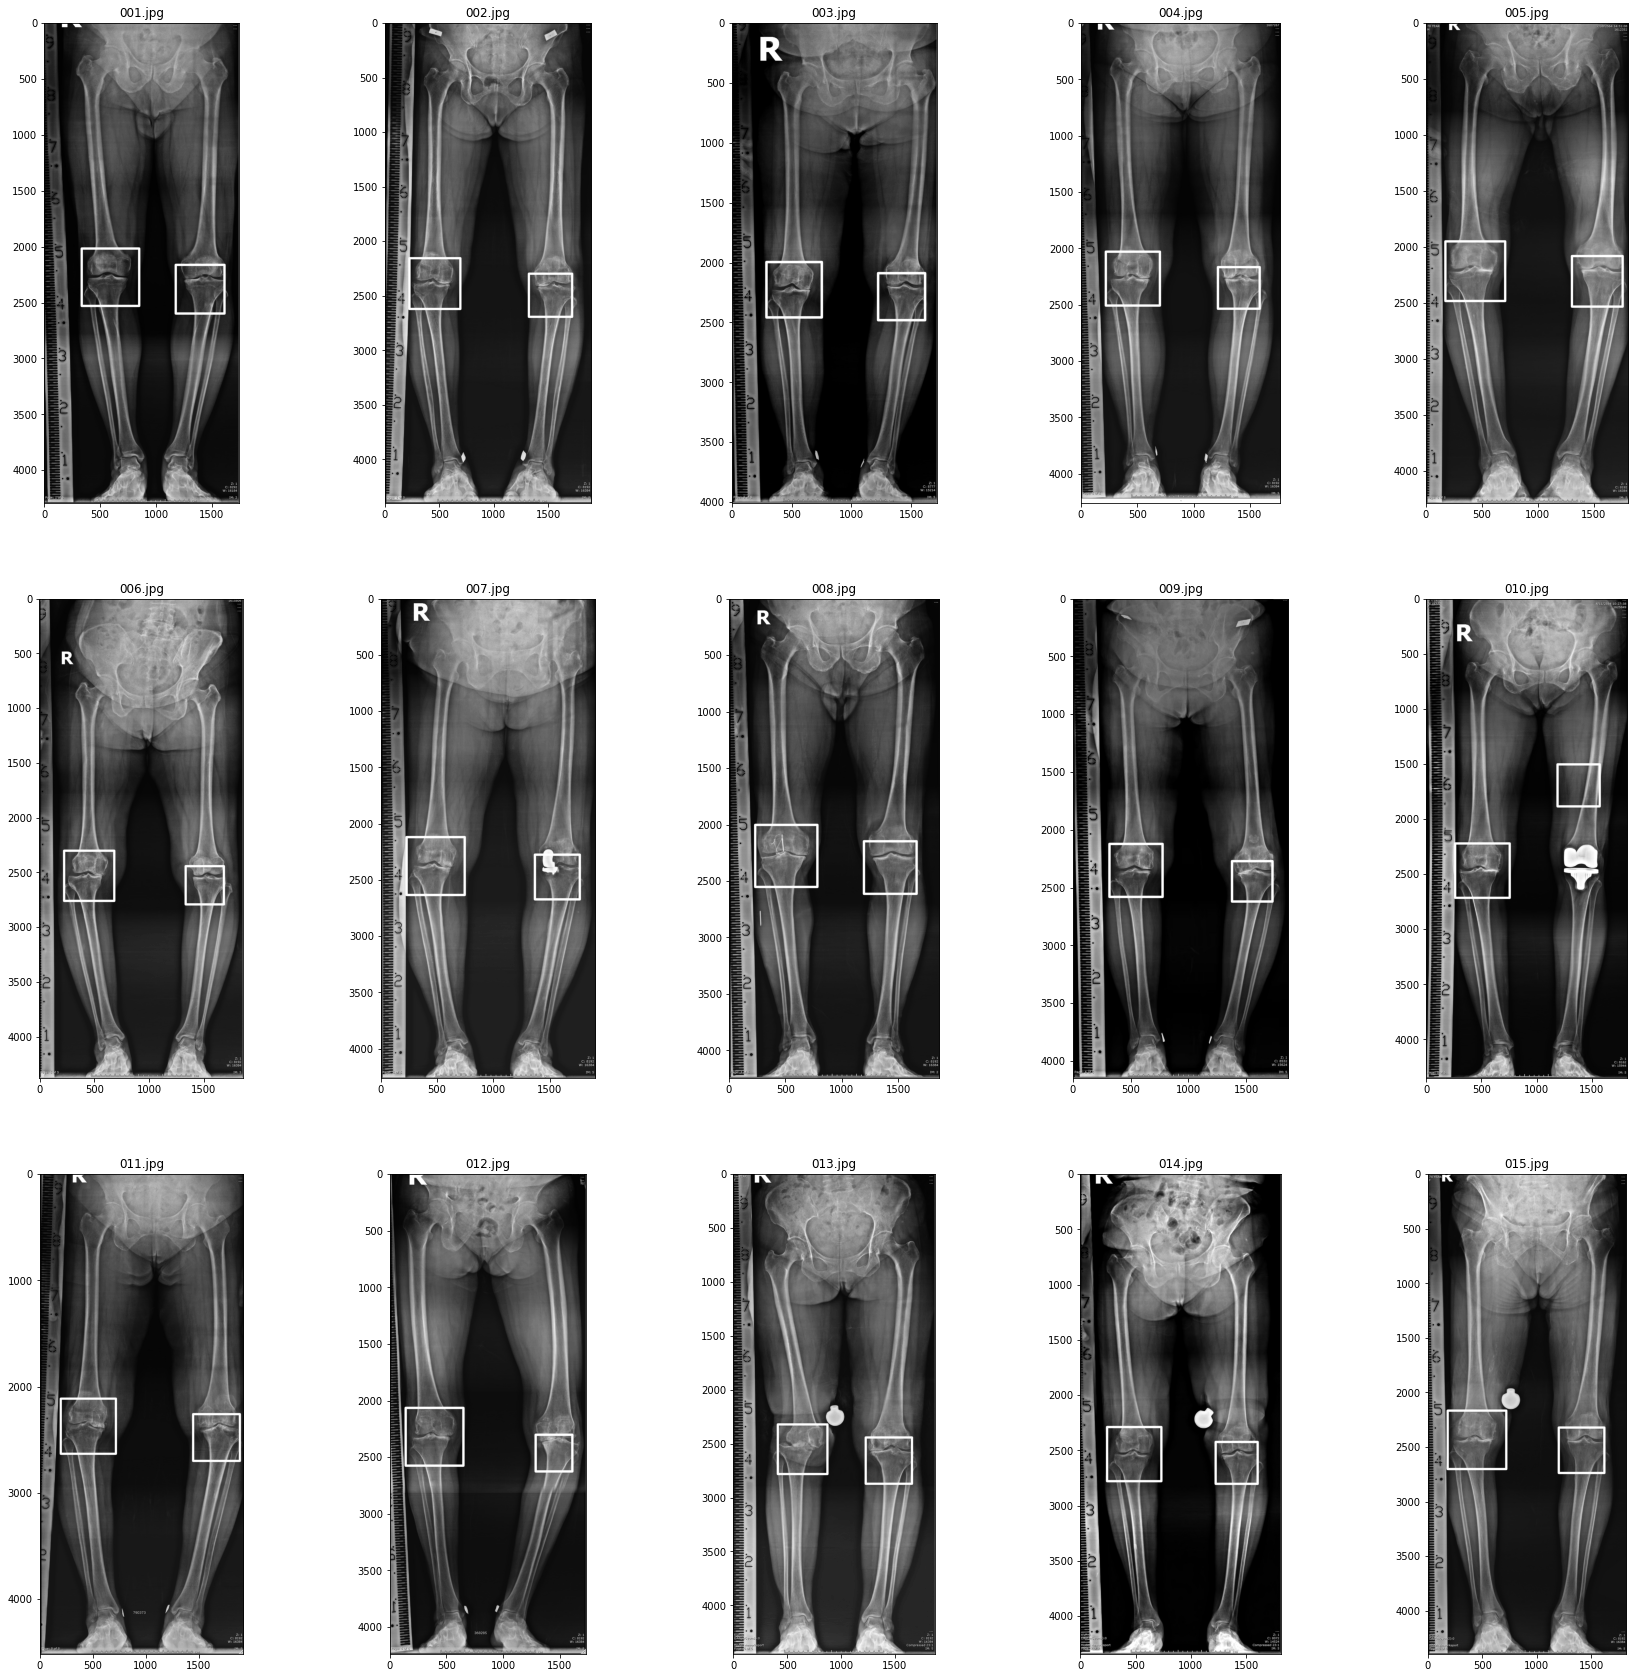

In [ ]:
dev_path = "../dev/"
i=1
plt.figure(figsize=(30,30))
for img_name in os.listdir(dev_path)[:20]:
    if img_name.endswith('.jpg'):
        img_path = dev_path+img_name

        # Preprocess
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        resized = (1024,1024)
        img_prep = preprocess(img, resized, region="mid")

        # Get breakpoints for left and right legs
        bp = getBreakpoint(img_prep)

        # Template Matching: Left image
        template_left = cv2.imread(template_left_path, cv2.IMREAD_GRAYSCALE)
        img_left = img_prep[:,:bp]
        x, y, w, h = templateMatcher(img_left,
                                    template_left,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(min_angle, angle_step+1, angle_step),
                                    )
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += (img.shape[0]-img.shape[1])//2
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

        # Template Matching: Right image
        template_right = cv2.imread(template_right_path, cv2.IMREAD_GRAYSCALE)
        img_right = img_prep[:,bp:]
        x, y, w, h = templateMatcher(img_right,
                                    template_right,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(-1*angle_step, max_angle+1, angle_step),
                                    )
        x += bp
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += (img.shape[0]-img.shape[1])//2
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

        plt.subplot(3,5,i)
        i+=1
        plt.imshow(img, cmap="gray")
        plt.title(img_name)

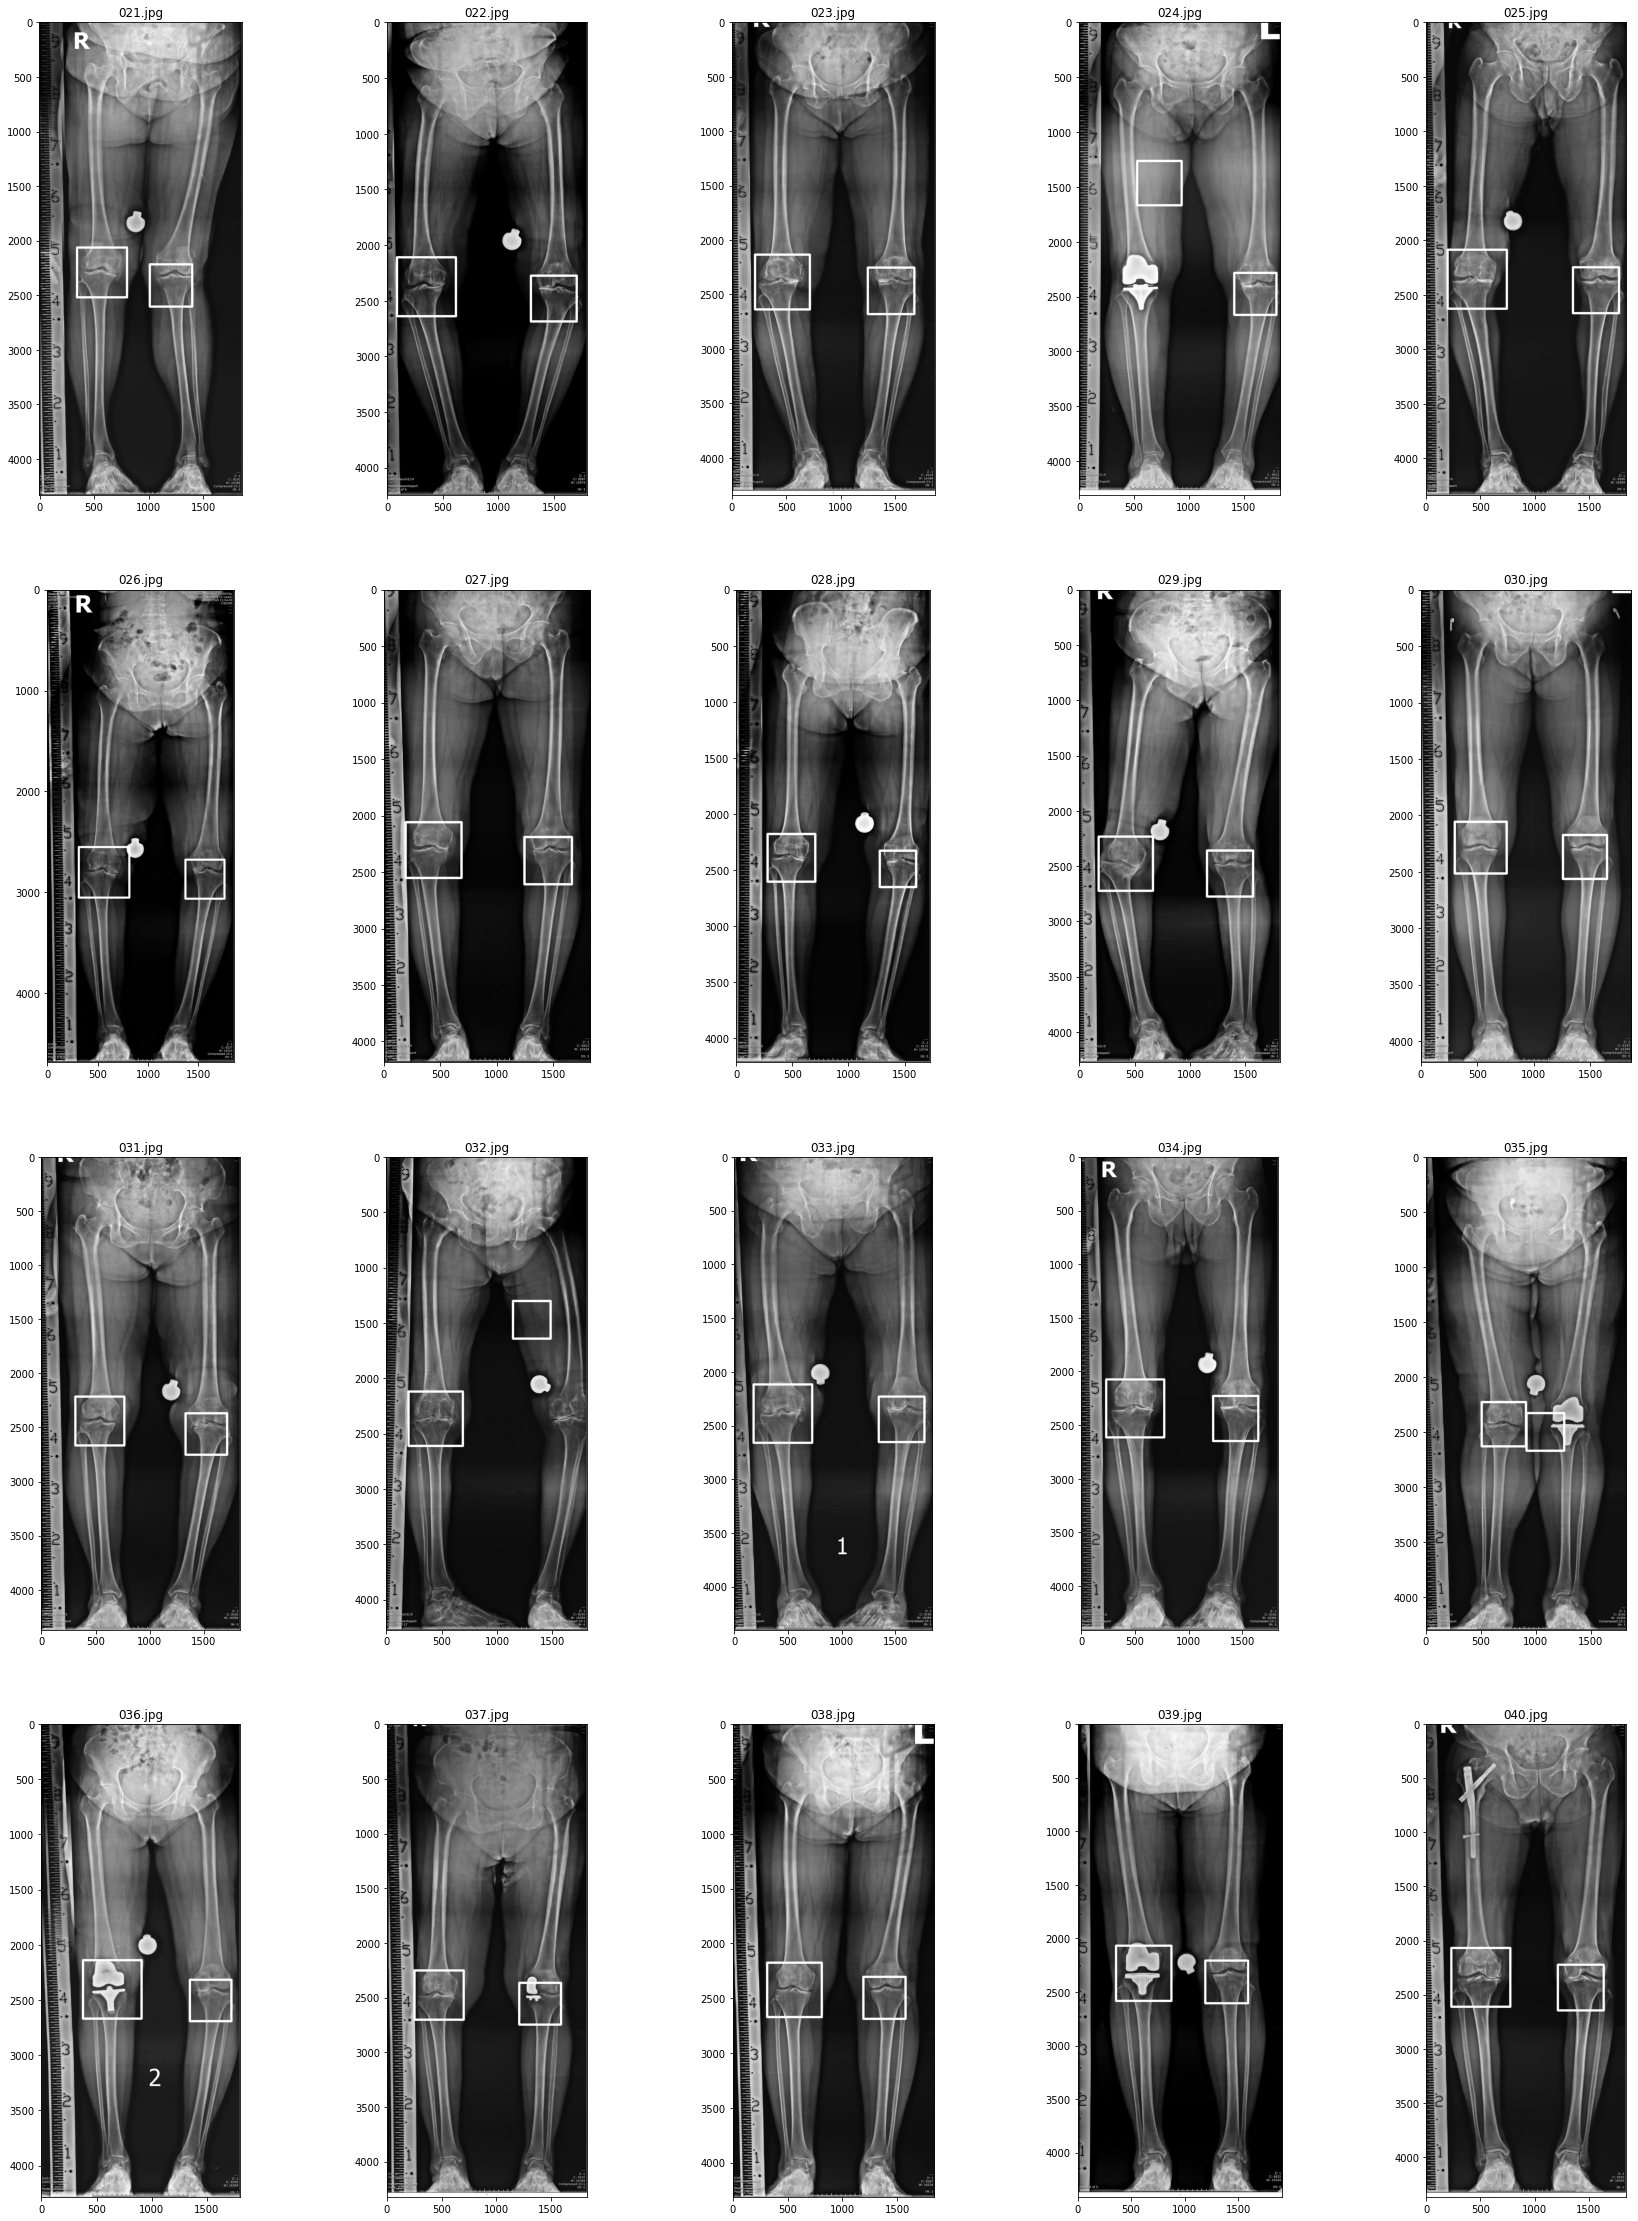

In [69]:
dev_path = "../dev/"
i=1
plt.figure(figsize=(30,40))
for img_name in os.listdir(dev_path)[20:40]:
    if img_name.endswith('.jpg'):
        img_path = dev_path+img_name

        # Preprocess
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        resized = (1024,1024)
        img_prep = preprocess(img, resized, region="mid")

        # Get breakpoints for left and right legs
        bp = getBreakpoint(img_prep)

        # Template Matching: Left image
        template_left = cv2.imread(template_left_path, cv2.IMREAD_GRAYSCALE)
        img_left = img_prep[:,:bp]
        x, y, w, h = templateMatcher(img_left,
                                    template_left,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(min_angle, angle_step+1, angle_step),
                                    )
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += (img.shape[0]-img.shape[1])//2
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

        # Template Matching: Right image
        template_right = cv2.imread(template_right_path, cv2.IMREAD_GRAYSCALE)
        img_right = img_prep[:,bp:]
        x, y, w, h = templateMatcher(img_right,
                                    template_right,
                                    scales=np.arange(min_scale, max_scale+scale_step, scale_step),
                                    angles=np.arange(-1*angle_step, max_angle+1, angle_step),
                                    )
        x += bp
        ## scale back
        [x,y,w,h] = np.array([x,y,w,h]) * img.shape[1] // resized[0] 
        y += (img.shape[0]-img.shape[1])//2
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 255, 255), 20)

        plt.subplot(4,5,i)
        i+=1
        plt.imshow(img, cmap="gray")
        plt.title(img_name)